<a href="https://colab.research.google.com/github/teaminii/MachineLearning/blob/main/Lec8_MLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 657 bytes/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 23.2 MB 53.2 MB/s 
     |████████████████████████████████| 23.3 MB 64.7 MB/s 
     |████████████████████████████████| 23.3 MB 84.0 MB/s 
     |████████████████████████████████| 22.1 MB 1.0 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 17.4 MB 1.4 MB/s 
     |████████████████████████████████| 17.3 MB 72 kB/s 
     |████████████████████████████████| 12.8 MB 36 kB/s 
     |████████████████████████████████| 12.7 MB 14.3 MB/s 
     |████████████████████████████████| 11.8 MB 21.2 MB/s 
     |████████████████████████████████| 5.9 MB 1.4 MB/s 
     |████████████████████████████████| 6.6 MB 28.6 MB/s 
     |████████████████████████████████| 6.6 MB 25.0 MB/s 
     |████████████████████████████████| 4.0 MB 36.6 MB/s 
     |████████████████████████████████| 10.2 MB 30.1 MB/s 
     |█

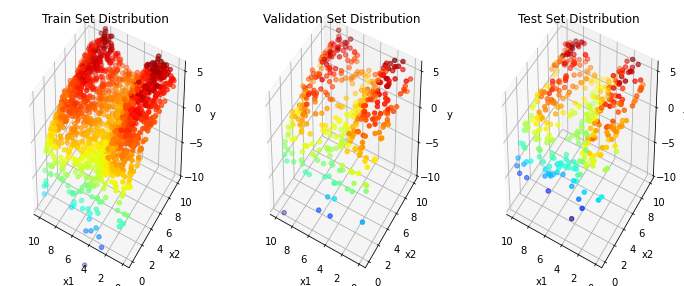

In [25]:
### 1. Data Generation 
### Regression 

%matplotlib inline
# : IPython 에서 제공하는 Rich output(도표, 그림, 소리 등) 표현방식
#  : notebook 을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## Generate DataSet
num_data = 2400
x1 = np.random.rand(num_data)*10   #random.rand() : 0~1 uniform distribution에서 샘플링
x2 = np.random.rand(num_data)*10
e = np.random.normal(0,0.5,num_data)  #np.random.normal : 해당 정규분포에 있는 값 중 num_data개를 무작위 추출
X = np.array([x1, x2]).T
y = 2*np.sin(x1)+np.log(0.5*x2**2)+e


## Split Dataset
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]


## Visualize Each Dataset
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,3,1, projection = '3d')
ax1.scatter(train_X[:,0], train_X[:,1],train_y,c=train_y,cmap='jet')
# ax1.scatter(x, y, z, c='g', marker='o')


ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)     # z축 범위 지정
ax1.view_init(40,-60)    # 3D plot 앵클 바꾸기 
ax1.invert_xaxis()

ax2 = fig.add_subplot(1,3,2, projection = '3d')
ax2.scatter(val_X[:,0], val_X[:,1], val_y, c= val_y, cmap = 'jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10,6)
ax2.view_init(40,-60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [39]:
#### 2. Model(Hypothesis) Define 

import torch
import torch.nn as nn


class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = nn.Linear(in_features = 2, out_features = 1, bias = True)
    # nn.Linear : pytorch에서 선형회귀모델 함수 
    #           : torch.nn.Linear(in_features,out_features,bias = True, device = None,dtype = None)

    def forward(sefl, x):
      return self.linear(x)


class MLPModel(nn.Module):
  def __init__(self, in_dim, out_dim, hid_dim):
    super(MLPModel, self).__init__()
    self.linear1 = nn.Linear(in_dim, hid_dim)       #input x1,x2 : 2dim  ,  hidden layer : 200
    self.linear2 = nn.Linear(hid_dim, out_dim)      # hidden layer -> ouput
    self.act = nn.ReLU()                            # ReLU : non-linear-function (역치함수)

  def forward(self, x):
    x = self.linear1(x)
    x = self.act(x)
    x = self.linear2(x)
    return x


In [34]:
####  3. Cost Function Define
reg_loss = nn.MSELoss()
# Mean Squared Error Loss : MSE Loss : Regression Problem 에서 사용 

801 parameters


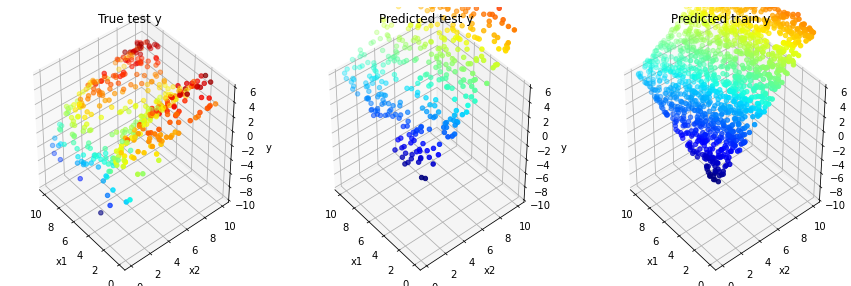

0 tensor(56.8348, grad_fn=<MseLossBackward>)


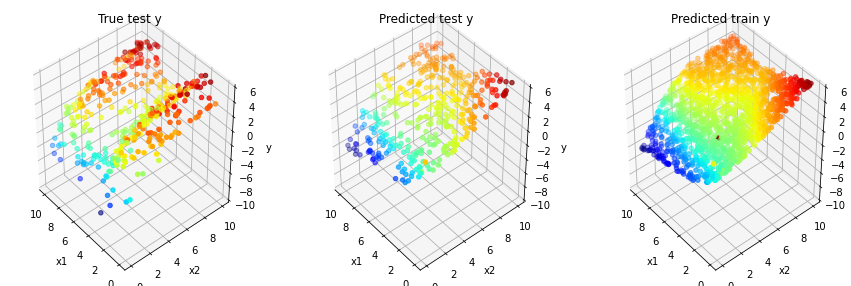

200 tensor(2.6505, grad_fn=<MseLossBackward>)


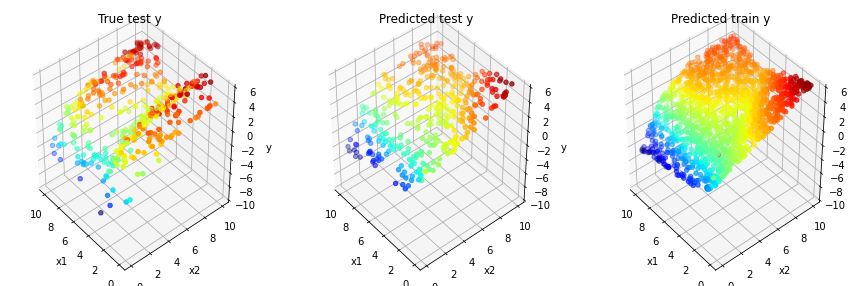

400 tensor(2.3214, grad_fn=<MseLossBackward>)


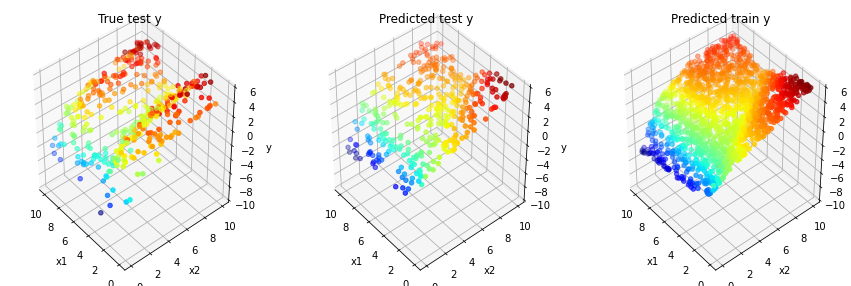

600 tensor(2.1290, grad_fn=<MseLossBackward>)


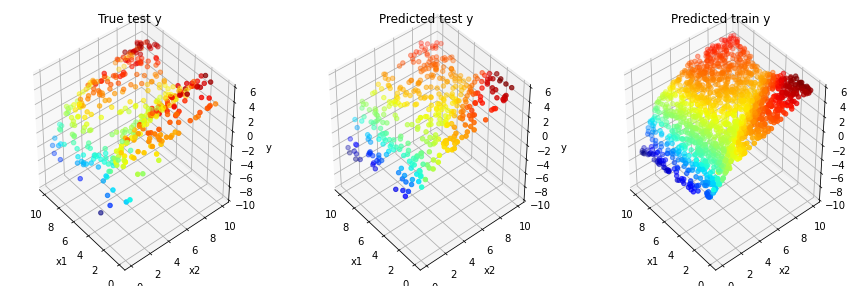

800 tensor(1.9926, grad_fn=<MseLossBackward>)


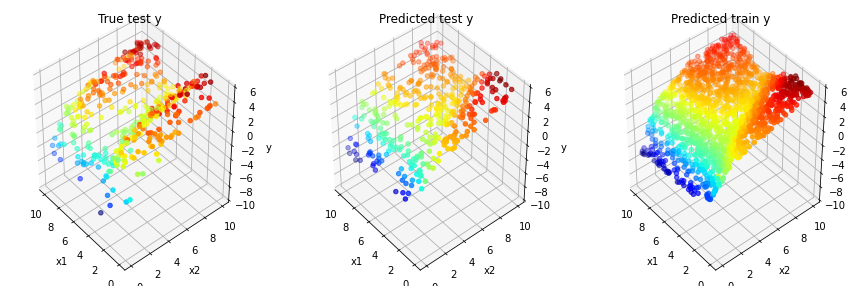

1000 tensor(1.8907, grad_fn=<MseLossBackward>)


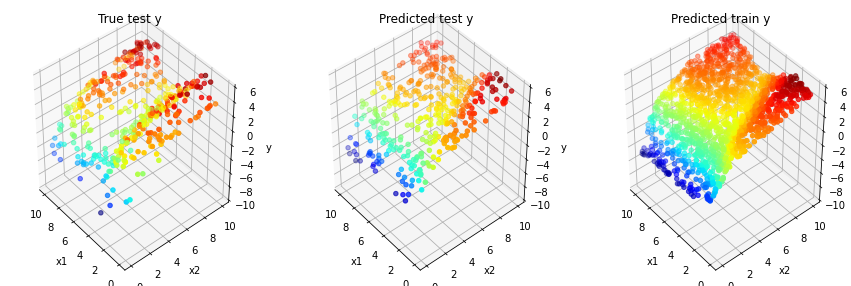

1200 tensor(1.8058, grad_fn=<MseLossBackward>)


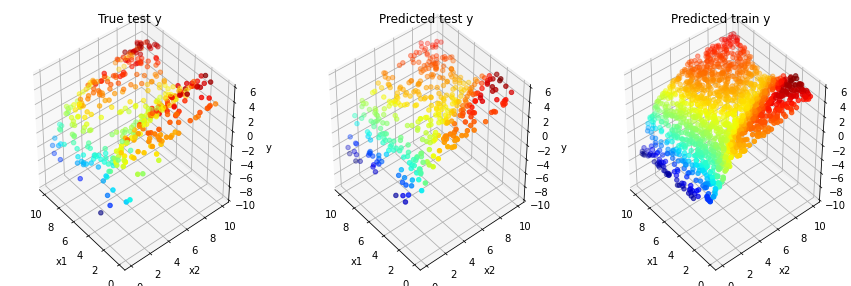

1400 tensor(1.7180, grad_fn=<MseLossBackward>)


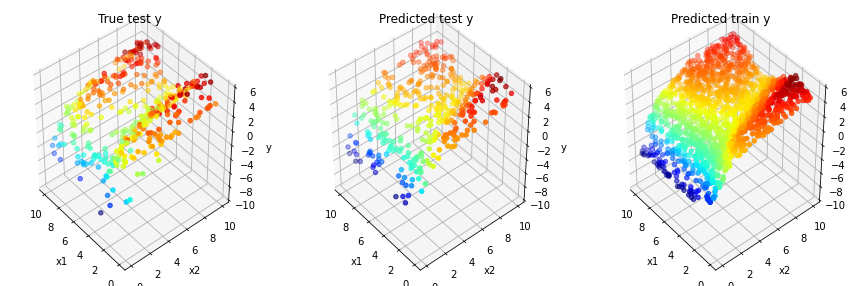

1600 tensor(1.6473, grad_fn=<MseLossBackward>)


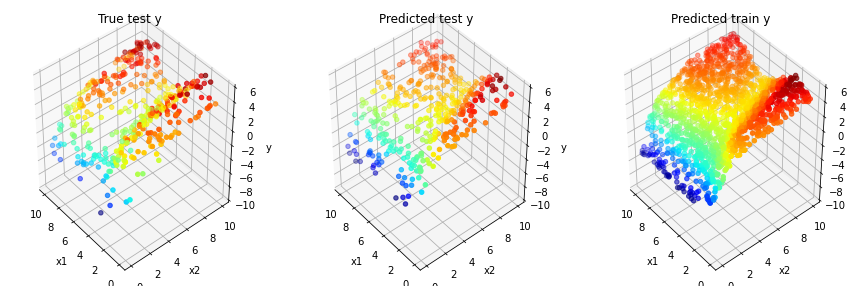

1800 tensor(1.5932, grad_fn=<MseLossBackward>)


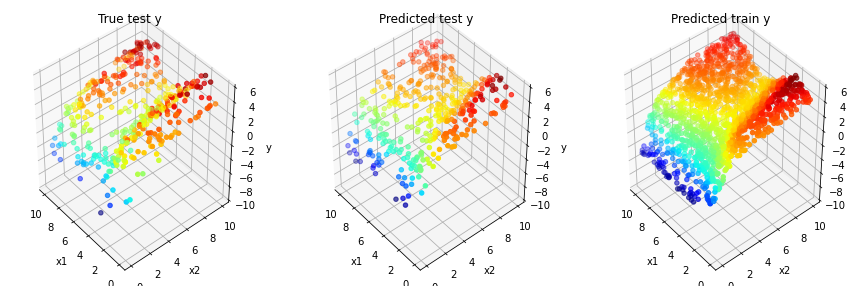

2000 tensor(1.5420, grad_fn=<MseLossBackward>)


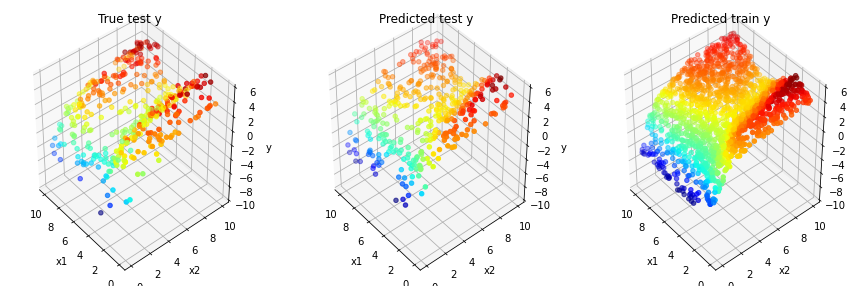

2200 tensor(1.4950, grad_fn=<MseLossBackward>)


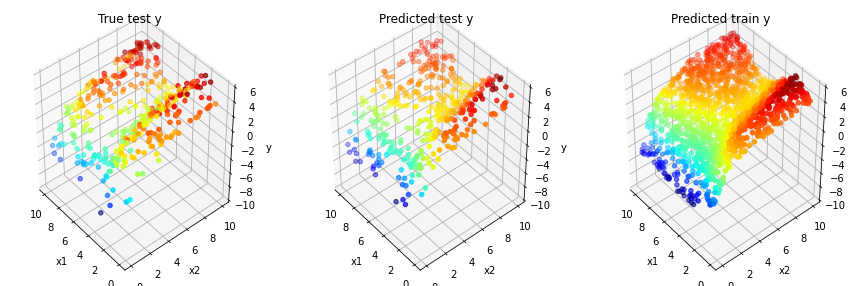

2400 tensor(1.4480, grad_fn=<MseLossBackward>)


KeyboardInterrupt: ignored

In [41]:
### 4. Train & Evaluation

import torch.optim as optim
from sklearn.metrics import mean_absolute_error

## !!!! Generate Model
# model =  LinearModel()
model = MLPModel(2,1,200)
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
# print : 801 parameters
# .requires_grad

lr = 0.005 
# learning rate
optimizer = optim.SGD(model.parameters(), lr = lr)

list_epoch = []
list_train_loss =[]
list_val_loss = []
list_mae = []
list_mae_epoch = []




## !!!! Train & Validation & Evaluation Model
epoch = 4000  # 학습 횟수 
for i in range(epoch) : 

  # 1. Train
  model.train()                # model을 train 모드로 세팅
  optimizer.zero_grad()        # optimizer gradient 초기화

  input_x = torch.Tensor(train_X)    #train_X, train_y = X[:1600, :], y[:1600]
  true_y = torch.Tensor(train_y)     
  pred_y = model(input_x) 

  loss = reg_loss(pred_y.squeeze(), true_y)
  loss.backward()  #그레디언트 구하기
  optimizer.step()
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy())


  # 2. Validation
  model.eval()
  optimizer.zero_grad()
  input_x = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y)
  pred_y = model(input_x)
  loss = reg_loss(pred_y.squeeze(), true_y)
  list_val_loss.append(loss.detach().numpy())


  # 3. Evalutation
  if i%200 == 0:
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(test_X)
    true_y = torch.Tensor(test_y)
    pred_y = model(input_x).detach().numpy()
    mae = mean_absolute_error(true_y, pred_y)
    list_mae.append(mae)
    list_mae_epoch.append(i)

    fig = plt.figure(figsize = (15,5))


    # Scattering
    # 1. True Y
    ax1 = fig.add_subplot(1,3,1, projection = '3d')
    ax1.scatter(test_X[:,0], test_X[:,1],test_y, c=test_y, cmap = 'jet')

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.set_zlim(-10, 6)
    ax1.view_init(40, -40)
    ax1.set_title('True test y')
    ax1.invert_xaxis()  


    # 2. Predicted Y
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('y')
    ax2.set_zlim(-10, 6)
    ax2.view_init(40, -40)
    ax2.set_title('Predicted test y')
    ax2.invert_xaxis()


    # 3. 
    input_x = torch.Tensor(train_X)
    pred_y = model(input_x).detach().numpy()

    ax3 = fig.add_subplot(1,3,3, projection = '3d')
    ax3.scatter(train_X[:, 0], train_X[:,1],pred_y,c=pred_y[:,0], cmap = 'jet')

    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_zlabel('y')
    ax3.set_zlim(-10,6)
    ax3.view_init(40, -40)
    ax3.set_title('Predicted train y')
    ax3.invert_xaxis()
        
    plt.show()
    print(i, loss)




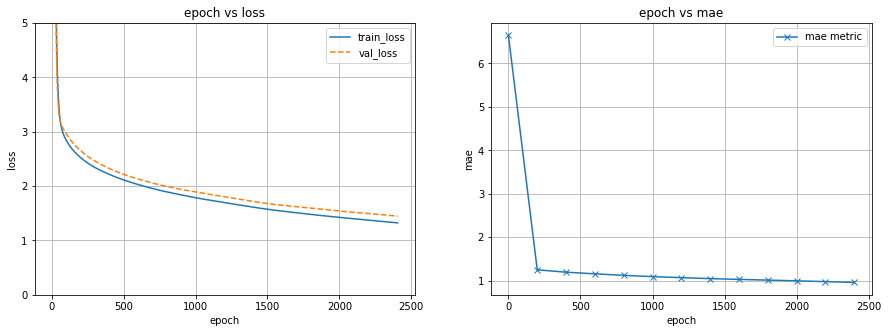

In [43]:
#### 5. Report Experiment : train_loss 와 val_loss 그리기 

fig = plt.figure(figsize = (15,5))

## Loss Fluctuation
ax1 = fig.add_subplot(1,2,1)
ax1.plot(list_epoch, list_train_loss, label = 'train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label = 'val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0,5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')


## Metric Flusctuation
ax2 = fig.add_subplot(1,2,2)
ax2.plot(list_mae_epoch, list_mae, marker = 'x', label = 'mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

plt.show()